## Library

In [1]:
import math
import random
import numpy as np
import squigglepy as sq
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded


In [2]:
def plot_anchor(anchor, bins=200, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(sq.get_percentiles(anchor))
    return None


def sample_tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                              flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                              bayes_update=None, n=1, debug=False):
    if bayes_update is None:
        bayes_update = lambda x: x
    
    n = int(n)
    if n > 1:
        return np.array([sample_tai_log_flop_needs(brain=brain,
                                                   efficiency=efficiency,
                                                   transformative_vs_human=transformative_vs_human,
                                                   horizon_length=horizon_length,
                                                   scaling_exponent=scaling_exponent,
                                                   flops_per_param_per_sec=flops_per_param_per_sec,
                                                   params=params,
                                                   ref_params=ref_params,
                                                   ref_params_samples=ref_params_samples,
                                                   bayes_update=bayes_update,
                                                   debug=debug) for _ in range(n)])
    elif n <= 0:
        return ValueError('n must be >= 1')

    
    brain_ = sq.sample(brain)
    eff_ = sq.sample(efficiency)
    tvh_ = sq.sample(transformative_vs_human)
    h_ = sq.sample(horizon_length)
    e_ = sq.sample(scaling_exponent)
    fpp_ = sq.sample(flops_per_param_per_sec)
    
    if params is None:
        params_ = brain_ + eff_ - fpp_        
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * ({brain_} + {eff_} - {fpp_})")
    else:
        params_ = sq.sample(params)
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * {params_}")
        
    return bayes_update(brain_ + eff_ + tvh_ + h_ + ref_params_samples - e_ * ref_params + e_ * params_)


def cotra_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.3 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.2 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.1 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def sample_cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop, n=1):
    return sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.const(1),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=horizon_length,
                                     scaling_exponent=sq.norm(0.5,1.1),
                                     flops_per_param_per_sec=sq.norm(1,2),
                                     bayes_update=bayes_update,
                                     n=n)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.393537993979475,
 5: 26.54697990969224,
 10: 27.228480414692566,
 20: 28.158285794038218,
 30: 29.13041180898311,
 40: 30.278824240757242,
 50: 31.478249424411754,
 60: 32.74601249076376,
 70: 34.06175189015803,
 80: 35.79462253183192,
 90: 38.351170869037496,
 95: 40.55530397893953,
 99: 45.031756022635484}


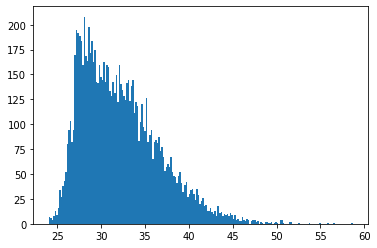

In [3]:
short_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(0,3), n=10000)
plot_anchor(short_horizon_nn_anchor)

Before update
{1: 22.061948400072268,
 5: 24.440985020145515,
 10: 25.92707454396526,
 20: 27.72435653865699,
 30: 29.12179997812473,
 40: 30.377362931741338,
 50: 31.581857631329413,
 60: 32.758264558103846,
 70: 34.17835101656264,
 80: 35.78488495738622,
 90: 38.36025356450869,
 95: 40.57937390168561,
 99: 45.66673911324916}
After update
{1: 25.393537993979475,
 5: 26.54697990969224,
 10: 27.228480414692566,
 20: 28.158285794038218,
 30: 29.13041180898311,
 40: 30.278824240757242,
 50: 31.478249424411754,
 60: 32.74601249076376,
 70: 34.06175189015803,
 80: 35.79462253183192,
 90: 38.351170869037496,
 95: 40.55530397893953,
 99: 45.031756022635484}


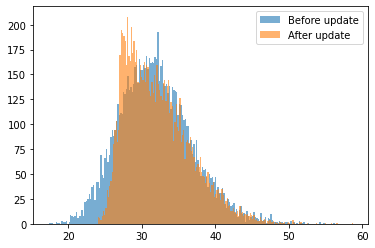

In [4]:
short_no_update = sample_cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None, n=10000)
plot_anchor(short_no_update, alpha=0.6, label='Before update')
plot_anchor(short_horizon_nn_anchor, alpha=0.6, label='After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.621292952964858,
 5: 27.95851753751465,
 10: 29.014347797850046,
 20: 30.806045124164136,
 30: 32.13214550508369,
 40: 33.391733408060034,
 50: 34.57733749005608,
 60: 35.81559467130293,
 70: 37.20525587599815,
 80: 38.95106235357209,
 90: 41.428983154646495,
 95: 43.60700909147725,
 99: 48.942087922089534}


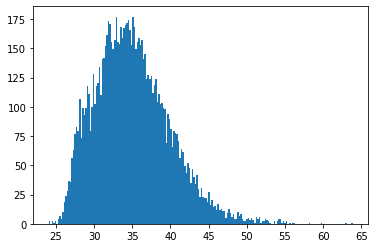

In [5]:
medium_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(3,6), n=10000)
plot_anchor(medium_horizon_nn_anchor)

## Cotra's Long NN Anchor

{1: 27.99963028326452,
 5: 30.499603695049196,
 10: 31.930602586487364,
 20: 33.69387527544115,
 30: 35.079418143141176,
 40: 36.3127423931149,
 50: 37.515433699081406,
 60: 38.750657559716664,
 70: 40.1580051148427,
 80: 41.91926188235942,
 90: 44.59322755300795,
 95: 46.751441630390104,
 99: 51.57381972048963}


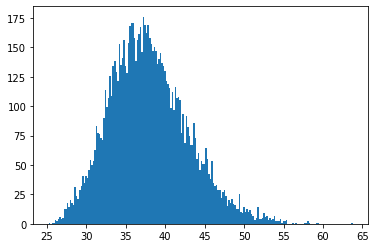

In [6]:
long_horizon_nn_anchor = sample_cotra_anchor(horizon_length=sq.norm(6,9), n=10000)
plot_anchor(long_horizon_nn_anchor)

## Cotra's GPT Anchor

{1: 24.99771777932035,
 5: 26.075169836214275,
 10: 26.63222837058829,
 20: 27.490839451375745,
 30: 28.179573014821713,
 40: 28.925213607715225,
 50: 29.908781193013613,
 60: 31.1243328751599,
 70: 32.47414355123975,
 80: 34.19795387920419,
 90: 36.758675663548495,
 95: 39.139261924105256,
 99: 44.38866368823328}


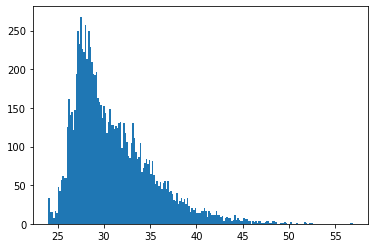

In [7]:
gpt_anchor = sample_cotra_anchor(horizon_length=sq.const(0), n=10000)
plot_anchor(gpt_anchor)

## Cotra's Lifetime Anchor

{1: 25.145129087223186,
 5: 26.102422557950383,
 10: 26.607947768805353,
 20: 27.284518921552287,
 30: 27.771954844048068,
 40: 28.320324623467947,
 50: 28.918664035607094,
 60: 29.676884248365745,
 70: 30.643480413573077,
 80: 31.84559284133836,
 90: 33.494807763497214,
 95: 35.01305243845382,
 99: 37.95673111345779}


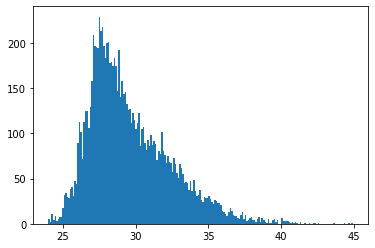

In [8]:
lifetime_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                            efficiency=sq.mixture([sq.lognorm(2,5),
                                                                   sq.lognorm(5,9)],
                                                                  [0.5,0.5]),
                                            transformative_vs_human=sq.norm(-2,2),
                                            horizon_length=sq.const(9),
                                            scaling_exponent=sq.const(0),
                                            flops_per_param_per_sec=sq.const(0),
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop,
                                            n=10000)
plot_anchor(lifetime_anchor)

## Cotra's Evolution Anchor

{1: 32.155311308372,
 5: 34.91901920989778,
 10: 36.10623954740047,
 20: 37.75445961314227,
 30: 38.912698198819484,
 40: 39.89083299586294,
 50: 40.82332211752582,
 60: 41.784892069894575,
 70: 42.82379071537479,
 80: 43.94582153855555,
 90: 45.62086734864333,
 95: 47.0178077111546,
 99: 49.6114607230523}


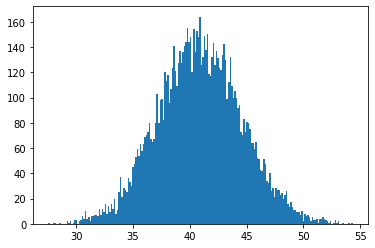

In [9]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = sq.const(16)
evolution_anchor = [sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                              efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                              transformative_vs_human=sq.norm(-2,2),
                                              horizon_length=lambda: (sq.sample(log_n_individuals) +
                                                                      sq.sample(evo_time_log_sec)),
                                              scaling_exponent=sq.const(0),
                                              flops_per_param_per_sec=sq.const(0),
                                              ref_params_samples=0,
                                              bayes_update=None) for s in range(10000)]
plot_anchor(evolution_anchor)


## Cotra's Genome Anchor

{1: 27.79374714806437,
 5: 29.2304686459067,
 10: 30.15762953731031,
 20: 31.353355694343467,
 30: 32.246719241741886,
 40: 33.02958905927262,
 50: 33.75251226891724,
 60: 34.49087927708462,
 70: 35.33451301694849,
 80: 36.34384394430328,
 90: 37.88221686668247,
 95: 39.25856791423719,
 99: 41.84013531909308}


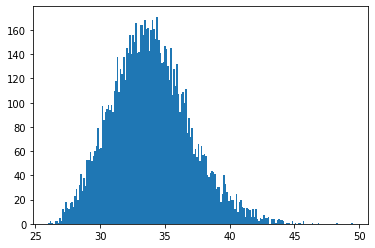

In [10]:
genome_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                          params=sq.norm(8.3,9.44), # Centered on 8.87... there are ~10^8.7 'params' in genome
                                          efficiency=sq.norm(0,2),
                                          transformative_vs_human=sq.norm(-2,2),
                                          horizon_length=sq.norm(7,9),
                                          scaling_exponent=sq.norm(0.5,1.1),
                                          flops_per_param_per_sec=sq.norm(1,2),
                                          bayes_update=cotra_bayes_update_against_low_flop,
                                          n=10000)
plot_anchor(genome_anchor)


## All Cotra Anchors

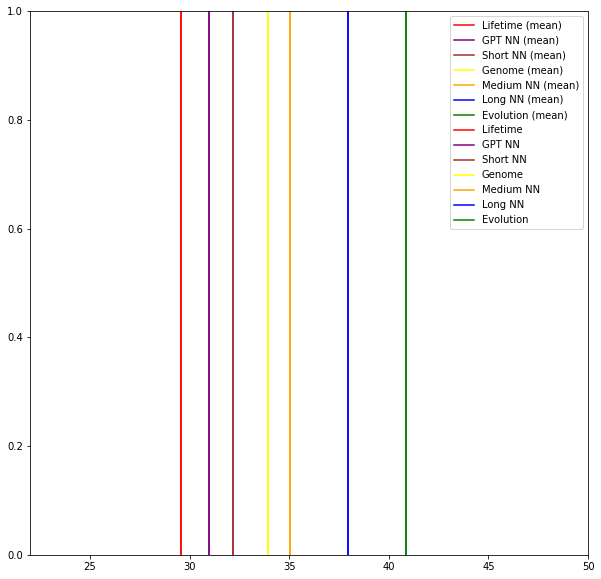

In [11]:
plt.figure(figsize=(10,10))
alpha = 0.6; bins = 100
plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN (mean)', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN (mean)', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome (mean)', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution (mean)', color='green')

plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution', color='green')

plt.xlim([22, 50])
plt.legend()
plt.show()

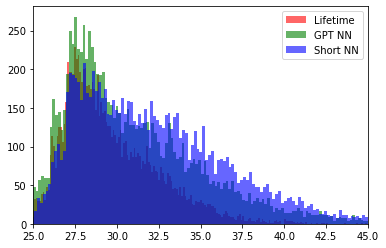

In [12]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.hist(short_horizon_nn_anchor, bins=200, alpha=alpha, label='Short NN', color='blue', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

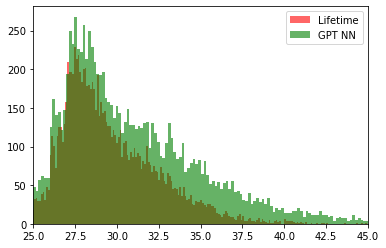

In [13]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Before update
{1: 18.764164457859245,
 5: 20.067000921383134,
 10: 20.7334806154809,
 20: 21.660845490605865,
 30: 22.4034107792212,
 40: 23.090404321119184,
 50: 23.712907018182946,
 60: 24.366213404584244,
 70: 25.0920535819012,
 80: 25.97212412668829,
 90: 27.3752248017419,
 95: 28.50491592648716,
 99: 30.828275066897927}
After update
{1: 24.0,
 5: 24.596017067160723,
 10: 25.08278776867043,
 20: 25.55917628983997,
 30: 25.998222843329465,
 40: 26.293503800087926,
 50: 26.61165672312211,
 60: 26.958023385553155,
 70: 27.317490944367076,
 80: 27.757606005819028,
 90: 28.423422264229444,
 95: 29.069015528759135,
 99: 31.254690486084094}
Cotra's lifetime anchor
{1: 25.145129087223186,
 5: 26.102422557950383,
 10: 26.607947768805353,
 20: 27.284518921552287,
 30: 27.771954844048068,
 40: 28.320324623467947,
 50: 28.918664035607094,
 60: 29.676884248365745,
 70: 30.643480413573077,
 80: 31.84559284133836,
 90: 33.494807763497214,
 95: 35.01305243845382,
 99: 37.95673111345779}


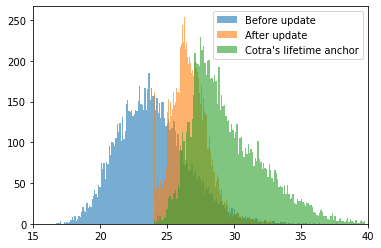

In [14]:
simple_lifetime_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                   efficiency=sq.const(0),
                                                   transformative_vs_human=sq.const(0),
                                                   horizon_length=sq.const(9),
                                                   scaling_exponent=sq.const(0),
                                                   flops_per_param_per_sec=sq.const(0),
                                                   ref_params_samples=0,
                                                   bayes_update=cotra_bayes_update_against_low_flop,
                                                   n=10000)

simple_lifetime_anchor_noup = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                        efficiency=sq.const(0),
                                                        transformative_vs_human=sq.const(0),
                                                        horizon_length=sq.const(9),
                                                        scaling_exponent=sq.const(0),
                                                        flops_per_param_per_sec=sq.const(0),
                                                        ref_params_samples=0,
                                                        bayes_update=None,
                                                        n=10000)

plot_anchor(simple_lifetime_anchor_noup, alpha=0.6, label='Before update')
plot_anchor(simple_lifetime_anchor, alpha=0.6, label='After update')
plot_anchor(lifetime_anchor, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

{1: 32.04067796911771,
 5: 34.52537133846697,
 10: 35.928068137728495,
 20: 37.6637800072803,
 30: 38.93008272209106,
 40: 39.94223658119658,
 50: 40.849420461558594,
 60: 41.79631798688897,
 70: 42.83669587531529,
 80: 44.04095384613383,
 90: 45.70416981479489,
 95: 47.237210489517274,
 99: 50.00899461300935}


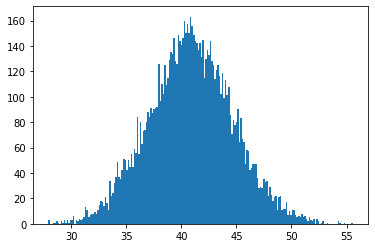

In [15]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = sq.const(16)

def sample_evolution_anchor(n=1):
    evo_anchor = sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                           efficiency=sq.norm(-6,5),
                                           transformative_vs_human=sq.norm(-2,2),
                                           horizon_length=lambda: (sq.sample(log_n_individuals) +
                                                                   sq.sample(evo_time_log_sec)),
                                           scaling_exponent=sq.const(0),
                                           flops_per_param_per_sec=sq.const(0),
                                           ref_params_samples=0,
                                           bayes_update=None,
                                           n=n)
    
    anthropic_adjustment = sq.norm(-1.3,1.3)
    
    r_ = random.random() # TODO: Convert these if/thens to mixtures
    environment_adjustment = np.array([sq.sample(sq.lognorm(1,5)) if r_ <= 0.2 else 0 for _ in range(n)])
    
    return evo_anchor + sq.sample(anthropic_adjustment, n=n) + environment_adjustment

updated_evolution_anchor = sample_evolution_anchor(n=10000)
plot_anchor(updated_evolution_anchor)


Cotra's evolution anchor
{1: 32.155311308372,
 5: 34.91901920989778,
 10: 36.10623954740047,
 20: 37.75445961314227,
 30: 38.912698198819484,
 40: 39.89083299586294,
 50: 40.82332211752582,
 60: 41.784892069894575,
 70: 42.82379071537479,
 80: 43.94582153855555,
 90: 45.62086734864333,
 95: 47.0178077111546,
 99: 49.6114607230523}
Updated evolution anchor
{1: 32.04067796911771,
 5: 34.52537133846697,
 10: 35.928068137728495,
 20: 37.6637800072803,
 30: 38.93008272209106,
 40: 39.94223658119658,
 50: 40.849420461558594,
 60: 41.79631798688897,
 70: 42.83669587531529,
 80: 44.04095384613383,
 90: 45.70416981479489,
 95: 47.237210489517274,
 99: 50.00899461300935}


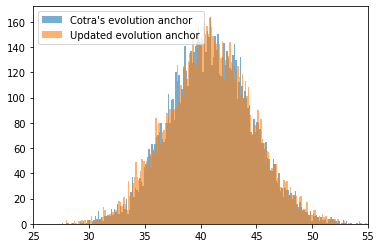

In [16]:
plot_anchor(evolution_anchor, alpha=0.6, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor, alpha=0.6, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()

## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.4678818322409706,
 60: 2.87280890276958,
 70: 4.268737945450639,
 80: 5.692682392830672,
 90: 8.441234016758608,
 95: 9.517565689672718,
 99: 10.747750833475491}


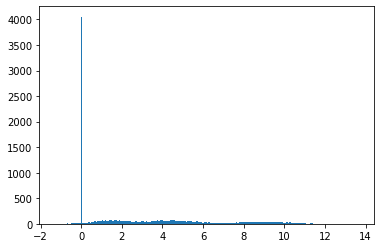

In [23]:
horizon_length = sq.sample(sq.mixture([
                               sq.const(0),
                               sq.norm(0,3),
                               sq.lognorm(3,7),
                               sq.norm(7,11)],
                          [0.4,0.2,0.25,0.15],
                          lclip=0), n=10000)

plot_anchor(horizon_length)

{1: 22.345343193067652,
 5: 24.86240473188172,
 10: 25.715968918808898,
 20: 27.20288600213452,
 30: 28.721386337588697,
 40: 30.19023314254535,
 50: 31.832941711379476,
 60: 33.39227590058001,
 70: 35.29435653500367,
 80: 37.616077413646494,
 90: 41.004877787348704,
 95: 43.958174889983134,
 99: 49.95150861029236}


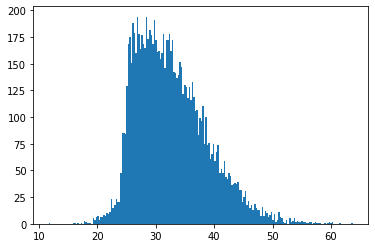

In [18]:
def peter_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = sample_tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                        efficiency=sq.norm(-1,2),               # Allows for AI being more efficient
                                        transformative_vs_human=sq.norm(-2,2),
                                        horizon_length=horizon_length,
                                        scaling_exponent=sq.norm(0.5,1.5),   # Update: scaling exponent now centered on 1
                                        flops_per_param_per_sec=sq.norm(1,2),
                                        bayes_update=peter_bayes_update_against_low_flop,
                                        n=10000)
plot_anchor(meta_anchor)


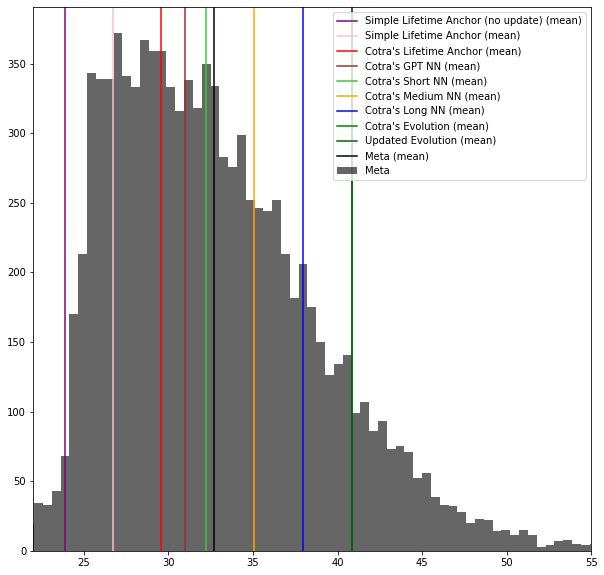

In [19]:
alpha = 0.6; bins = 100
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor), label='Meta (mean)', color='black')
plt.hist(meta_anchor, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([22, 55])
plt.legend()
plt.show()

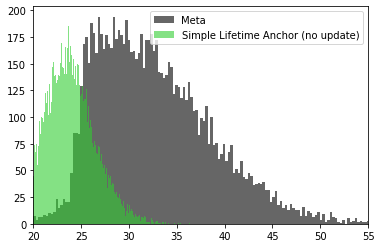

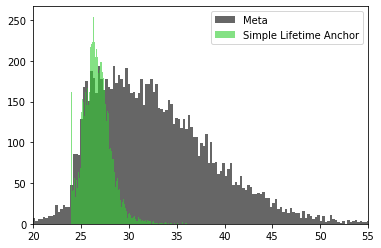

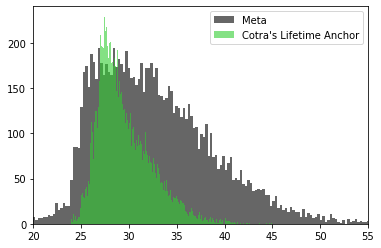

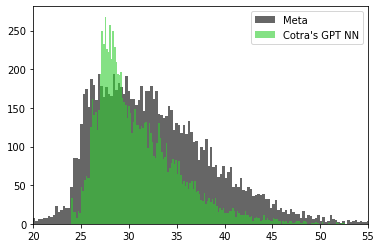

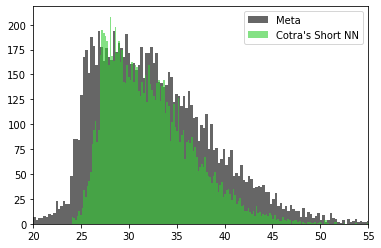

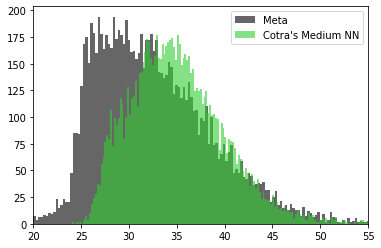

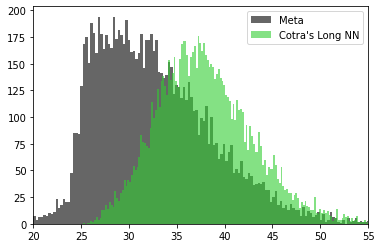

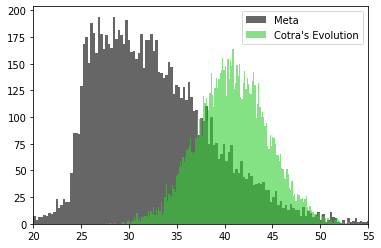

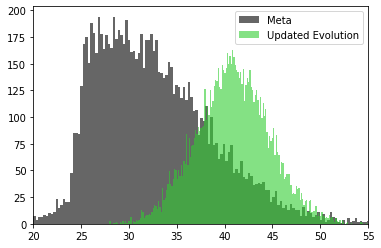

In [20]:
for anchors in [[simple_lifetime_anchor_noup, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor, 'Simple Lifetime Anchor'],
                [lifetime_anchor, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor, 'Cotra\'s Long NN'],
                [evolution_anchor, 'Cotra\'s Evolution'],
                [updated_evolution_anchor, 'Updated Evolution']]:
    alpha = 0.6
    plt.hist(meta_anchor, bins=200, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=200, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([20, 55])
    plt.legend()
    plt.show()